In [1]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
sys.path.insert(0, "..")
import random
import src.utils.dtw as dtw
import src.models.augmentations as augmentations
import src.visualization.visualize as visualize
import src.utils.data_extraction as extractions
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.interpolate import interp1d
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import check_random_state
from src.visualization.visualize import plot_series


# Data import


In [2]:
timeSeries = pd.read_json('../data/processed/processed_time_series.json', orient='records', lines=True)
# Filtrar las series de tiempo por clase
healthy_cop_x = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_cop_x = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_cop_x = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

healthy_cop_y = timeSeries[timeSeries['class'] == 'Healthy']['cop_y']
neuropathic_cop_y = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_y']
diabetic_cop_y = timeSeries[timeSeries['class'] == 'Diabetic']['cop_y']

# Data augmentation

## Jitering

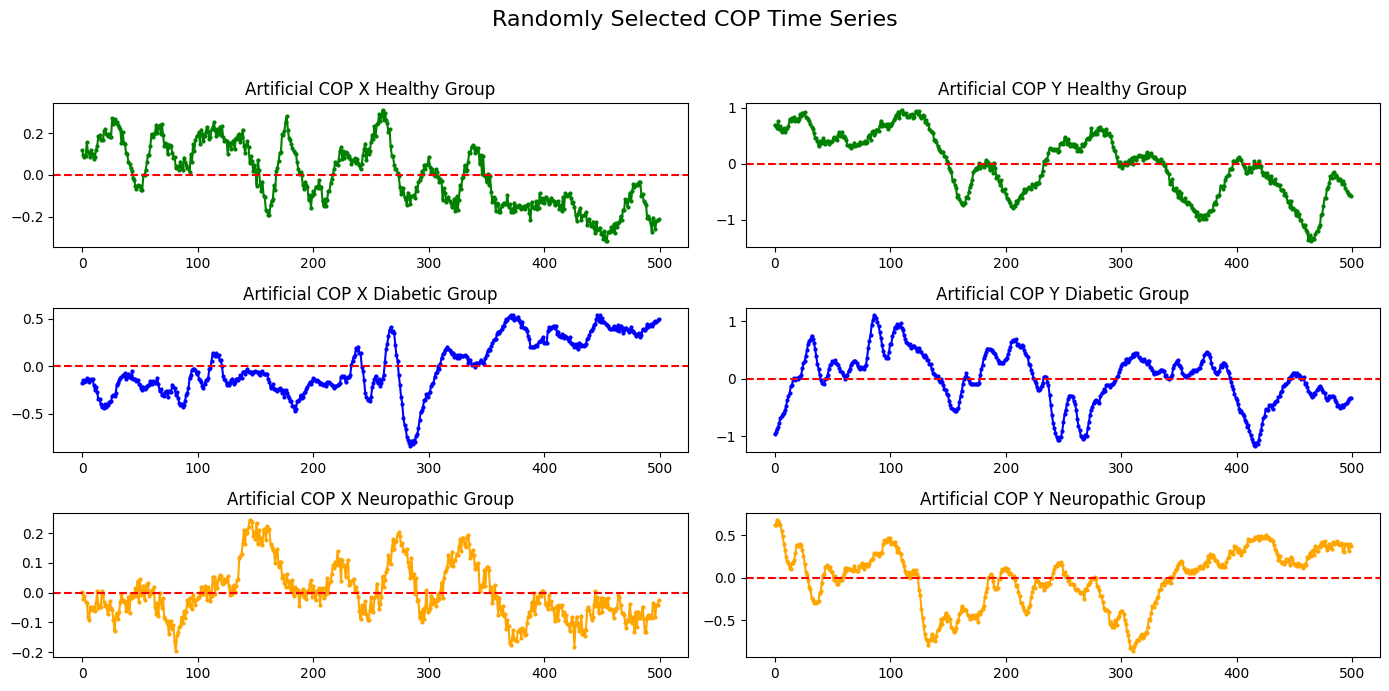

In [3]:
# Aplicar ruido gaussiano a las series de tiempo
noisy_healthy_cop_x = augmentations.augment_time_series_with_noise(healthy_cop_x, 1600)
noisy_neuropathic_cop_x = augmentations.augment_time_series_with_noise(neuropathic_cop_x, 1600)
noisy_diabetic_cop_x = augmentations.augment_time_series_with_noise(diabetic_cop_x, 1600)

noisy_healthy_cop_y = augmentations.augment_time_series_with_noise(healthy_cop_y, 1600)
noisy_neuropathic_cop_y = augmentations.augment_time_series_with_noise(neuropathic_cop_y, 1600)
noisy_diabetic_cop_y = augmentations.augment_time_series_with_noise(diabetic_cop_y, 1600)

# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(noisy_healthy_cop_x)-1)
diabetic_random_number = random.randint(0, len(noisy_diabetic_cop_x)-1)
neuropathic_random_number = random.randint(0, len(noisy_diabetic_cop_x)-1)

# Graficar las series de tiempo con ruido
visualize.plot_cop_time_series(noisy_healthy_cop_x[healthy_random_number], noisy_healthy_cop_y[healthy_random_number],
                     noisy_diabetic_cop_x[diabetic_random_number], noisy_diabetic_cop_y[diabetic_random_number],
                     noisy_neuropathic_cop_x[neuropathic_random_number], noisy_neuropathic_cop_y[neuropathic_random_number])

In [4]:
# Crear DataFrames de datos reales y aumentados
real_data = pd.DataFrame({
    'cop_x': pd.concat([healthy_cop_x, neuropathic_cop_x, diabetic_cop_x]),
    'cop_y': pd.concat([healthy_cop_y, neuropathic_cop_y, diabetic_cop_y]),
    'class': ['Healthy'] * len(healthy_cop_x) + ['Neuropathic'] * len(neuropathic_cop_x) + ['Diabetic'] * len(diabetic_cop_x),
    'flag': 'real'
})


noisy_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(noisy_healthy_cop_x), pd.Series(noisy_neuropathic_cop_x), pd.Series(noisy_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(noisy_healthy_cop_y), pd.Series(noisy_neuropathic_cop_y), pd.Series(noisy_diabetic_cop_y)]),
    'class': ['Healthy'] * len(noisy_healthy_cop_x) + ['Neuropathic'] * len(noisy_neuropathic_cop_x) + ['Diabetic'] * len(noisy_diabetic_cop_x),
    'flag': 'augmented'
})

In [5]:
noisy_data.to_json('../data/processed/noisy_time_series.json', orient='records', lines=True)

### Feature extraction

In [6]:
extractions.add_acceleration_columns(noisy_data)

Calculating accelerations: 100%|██████████| 5001/5001 [00:00<00:00, 10916.49it/s]


### Plotting

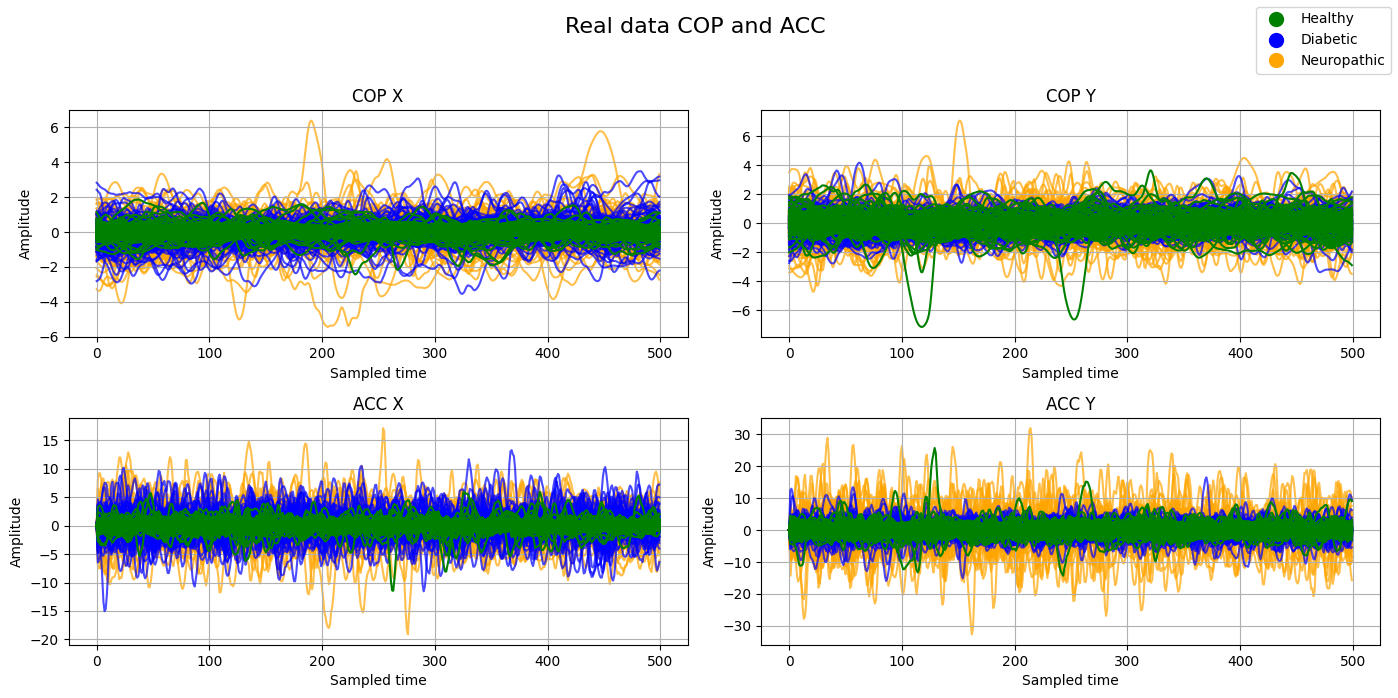

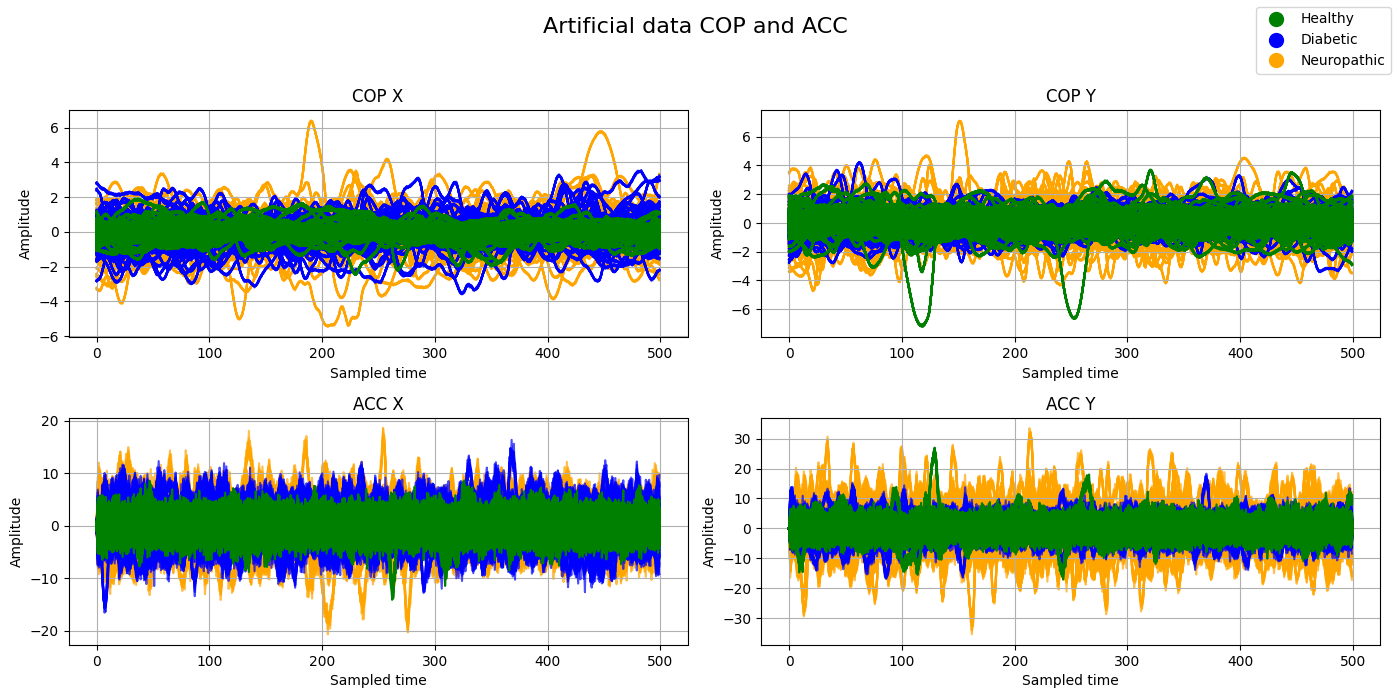

In [7]:
visualize.plot_cop_and_acc_time_series(timeSeries, alt_title='Real data COP and ACC')
visualize.plot_cop_and_acc_time_series( noisy_data, alt_title='Artificial data COP and ACC')

## Flipping


In [8]:
flipped_healthy_cop_x = augmentations.flip_time_series_set(healthy_cop_x)
flipped_neuropathic_cop_x = augmentations.flip_time_series_set(neuropathic_cop_x)
flipped_diabetic_cop_x = augmentations.flip_time_series_set(diabetic_cop_x)

flipped_healthy_cop_y = augmentations.flip_time_series_set(healthy_cop_y)
flipped_neuropathic_cop_y = augmentations.flip_time_series_set(neuropathic_cop_y)
flipped_diabetic_cop_y = augmentations.flip_time_series_set(diabetic_cop_y)



flipped_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(flipped_healthy_cop_x), pd.Series(flipped_neuropathic_cop_x), pd.Series(flipped_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(flipped_healthy_cop_y), pd.Series(flipped_neuropathic_cop_y), pd.Series(flipped_diabetic_cop_y)]),
    'class': ['Healthy'] * len(flipped_healthy_cop_x) + ['Neuropathic'] * len(flipped_neuropathic_cop_x) + ['Diabetic'] * len(flipped_diabetic_cop_x),
    'flag': 'augmented'
})

extractions.add_acceleration_columns(flipped_data)

Calculating RMS for Cop: 100%|██████████| 433/433 [00:00<00:00, 14422.23it/s]


cop_x  \
0    [0.0146754532, 0.0188719624, 0.0297414576, 0.0...   
1    [-0.1140214912, -0.1055724366, -0.1016190383, ...   
2    [-0.14757132550000002, -0.1084999324, -0.07262...   
3    [-0.020669378800000002, -0.009749782, -0.00317...   
4    [-0.050458873, -0.046778466500000004, -0.03954...   
..                                                 ...   
140  [0.2643773924, 0.2833187151, 0.300762211, 0.29...   
141  [0.2377767684, 0.268629145, 0.2914546110000000...   
142  [0.7914635344000001, 0.6941312203000001, 0.600...   
143  [-0.1681722572, -0.1879506027, -0.1779640003, ...   
144  [0.4358311419, 0.46704931380000003, 0.51010312...   

                                                 cop_y     class       flag  \
0    [-0.22017910270000002, -0.2370699018, -0.27641...   Healthy  augmented   
1    [-0.37085218750000004, -0.3825798407, -0.39222...   Healthy  augmented   
2    [-0.6778398401, -0.7446942118000001, -0.791285...   Healthy  augmented   
3    [-0.068413284, -0.0612571961, -0.0441357776, -...   Healthy  augmented   
4    [-0.4229202796, -0.4245245811, -0.4349305946, ...   Healthy  augmented   
..                                                 ...       ...        ...   
140  [-0.14630841860000002, -0.1224872583, -0.06146...  Diabetic  augmented   
141  [0.2390295473, 0.3174649348, 0.4138639857, 0.5...  Diabetic  augmented   
142  [-1.2050081869, -1.0715960273, -0.8874539119, ...  Diabetic  augmented   
143  [0.6082590892, 0.6401822551, 0.675456810600000...  Diabetic  augmented   
144  [-0.5777486337000001, -0.6420071861000001, -0....  Diabetic  augmented   

                                                 acc_x  \
0    [0.0, 0.10491273000000001, 0.27173738, 0.34416...   
1    [0.0, 0.21122636500000014, 0.09883495749999985...   
2    [0.0, 0.9767848275000004, 0.8968895849999998, ...   
3    [0.0, 0.27298992000000005, 0.1642924925, 0.198...   
4    [0.0, 0.09201016249999992, 0.1807820875000001,...   
..                                                 ...   
140  [0.0, 0.4735330674999996, 0.43608739749999986,...   
141  [0.0, 0.7713094150000002, 0.5706366500000004, ...   
142  [0.0, -2.4333078524999996, -2.335865102500001,...   
143  [0.0, -0.4944586374999997, 0.24966505999999972...   
144  [0.0, 0.7804542975000008, 1.0763453275000001, ...   

                                                 acc_y  rms_acc_x  rms_acc_y  \
0    [0.0, -0.4222699774999998, -0.9836399124999999...   0.275944   1.017366   
1    [0.0, -0.29319132999999914, -0.241083397499999...   0.348282   1.094997   
2    [0.0, -1.671359292500002, -1.1647880725000004,...   0.584157   1.367482   
3    [0.0, 0.17890219750000008, 0.42803546249999996...   0.330530   1.242923   
4    [0.0, -0.0401075375000004, -0.2601503374999994...   0.408705   1.535297   
..                                                 ...        ...        ...   
140  [0.0, 0.5955290075000005, 1.5255284999999998, ...   0.489612   1.497778   
141  [0.0, 1.9608846874999994, 2.4099762725000002, ...   0.552683   1.393689   
142  [0.0, 3.335303989999999, 4.603552885000001, 4....   1.387061   2.458332   
143  [0.0, 0.7980791474999999, 0.8818638875000007, ...   1.197925   2.122737   
144  [0.0, -1.60646381, -1.8035325475000001, -1.383...   1.625840   2.126785   

           path  samp_en_x  ...       f80_x        f80_y    mf_lf_x  \
0    212.701212   0.025352  ...  193.615346   453.199431  11.402748   
1    162.057518   0.031151  ...  154.466090   424.615996  10.249035   
2    252.198065   0.052475  ...  221.181984   792.630826  12.012784   
3    156.655239   0.014981  ...  119.803139   487.840236   6.199874   
4    244.140126   0.031037  ...  169.824356   673.075707  11.367458   
..          ...        ...  ...         ...          ...        ...   
140  166.510287   0.046114  ...  331.626338   508.533151  19.068387   
141  170.527167   0.043041  ...  250.750041   532.558716  13.135790   
142  322.660935   0.188883  ...  600.498746   864.232721  36.251601   
143  438.804972   0.128645  ...  58

### Plotting

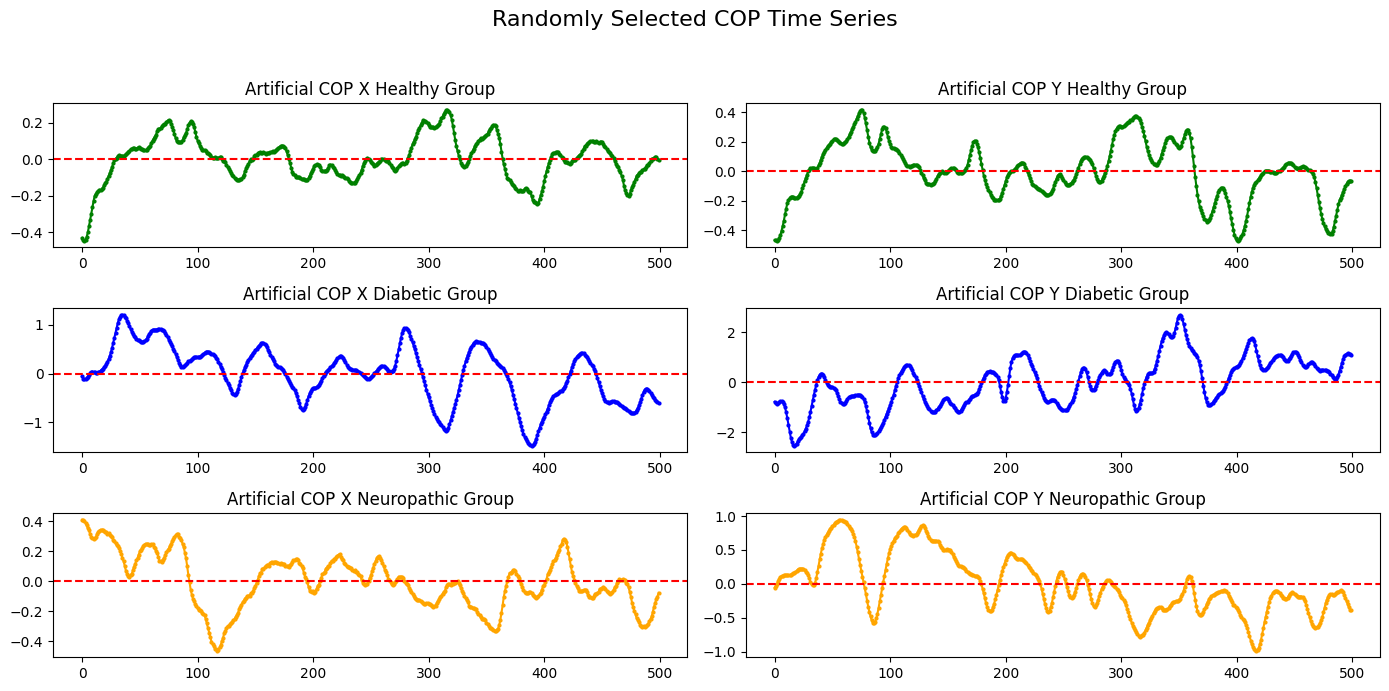

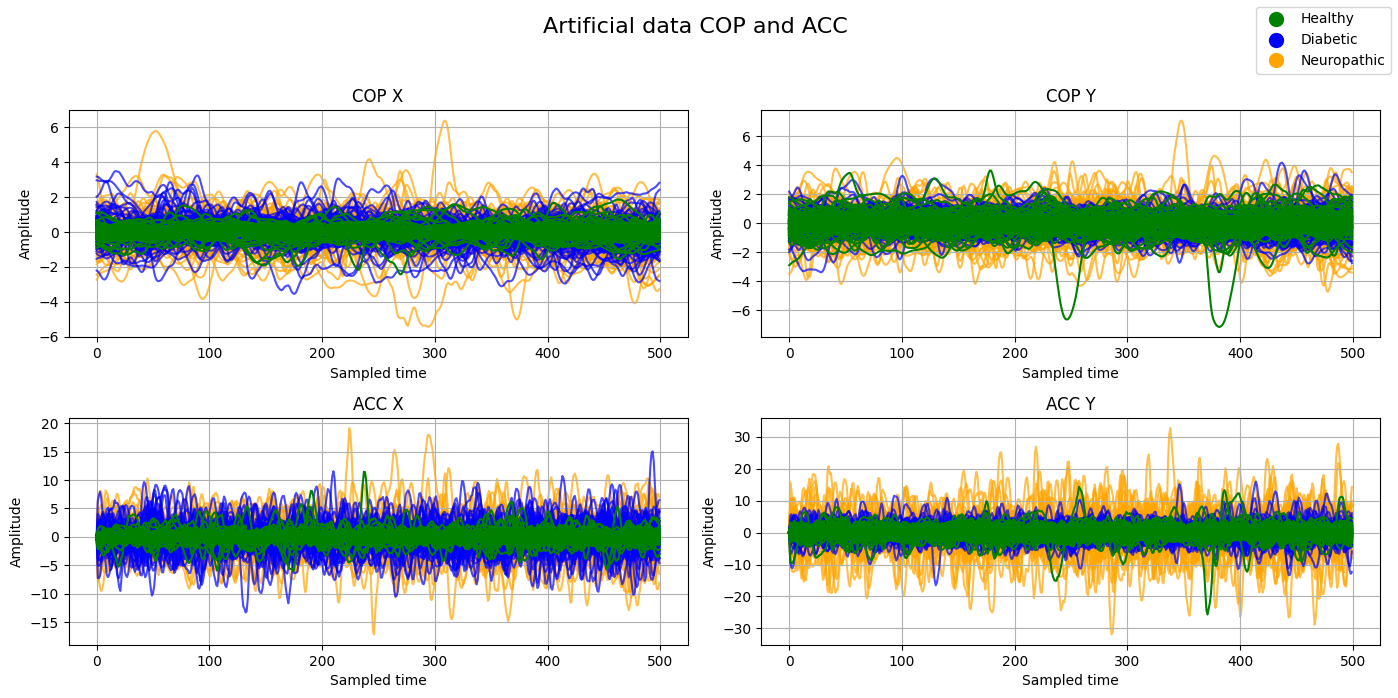

In [9]:
# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(flipped_healthy_cop_x))
diabetic_random_number = random.randint(0, len(flipped_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(flipped_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(flipped_healthy_cop_x[healthy_random_number], flipped_healthy_cop_y[healthy_random_number],
                     flipped_diabetic_cop_x[diabetic_random_number], flipped_diabetic_cop_y[diabetic_random_number],
                     flipped_neuropathic_cop_x[neuropathic_random_number], flipped_neuropathic_cop_y[neuropathic_random_number], export_filename='cop_random_flipped_series')
visualize.plot_cop_and_acc_time_series(flipped_data, alt_title='Artificial data COP and ACC', export_filename='cop_acc_flipped_series')

### Exportation

In [10]:
flipped_data.to_json('../data/processed/flipped_time_series.json', orient='records', lines=True)


## Scaling

In [11]:
scaled_healthy_cop_x = augmentations.scaling(healthy_cop_x, num_samples=1600)
scaled_neuropathic_cop_x = augmentations.scaling(neuropathic_cop_x, num_samples=1600)
scaled_diabetic_cop_x = augmentations.scaling(diabetic_cop_x, num_samples=1600)

scaled_healthy_cop_y = augmentations.scaling(healthy_cop_y, num_samples=1600)
scaled_neuropathic_cop_y = augmentations.scaling(neuropathic_cop_y, num_samples=1600)
scaled_diabetic_cop_y = augmentations.scaling(diabetic_cop_y, num_samples=1600)



scaled_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(scaled_healthy_cop_x), pd.Series(scaled_neuropathic_cop_x), pd.Series(scaled_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(scaled_healthy_cop_y), pd.Series(scaled_neuropathic_cop_y), pd.Series(scaled_diabetic_cop_y)]),
    'class': ['Healthy'] * len(scaled_healthy_cop_x) + ['Neuropathic'] * len(scaled_neuropathic_cop_x) + ['Diabetic'] * len(scaled_diabetic_cop_x),
    'flag': 'augmented'
})

In [12]:
extractions.add_acceleration_columns(scaled_data)

Calculating accelerations: 100%|██████████| 4367/4367 [00:00<00:00, 10861.09it/s]


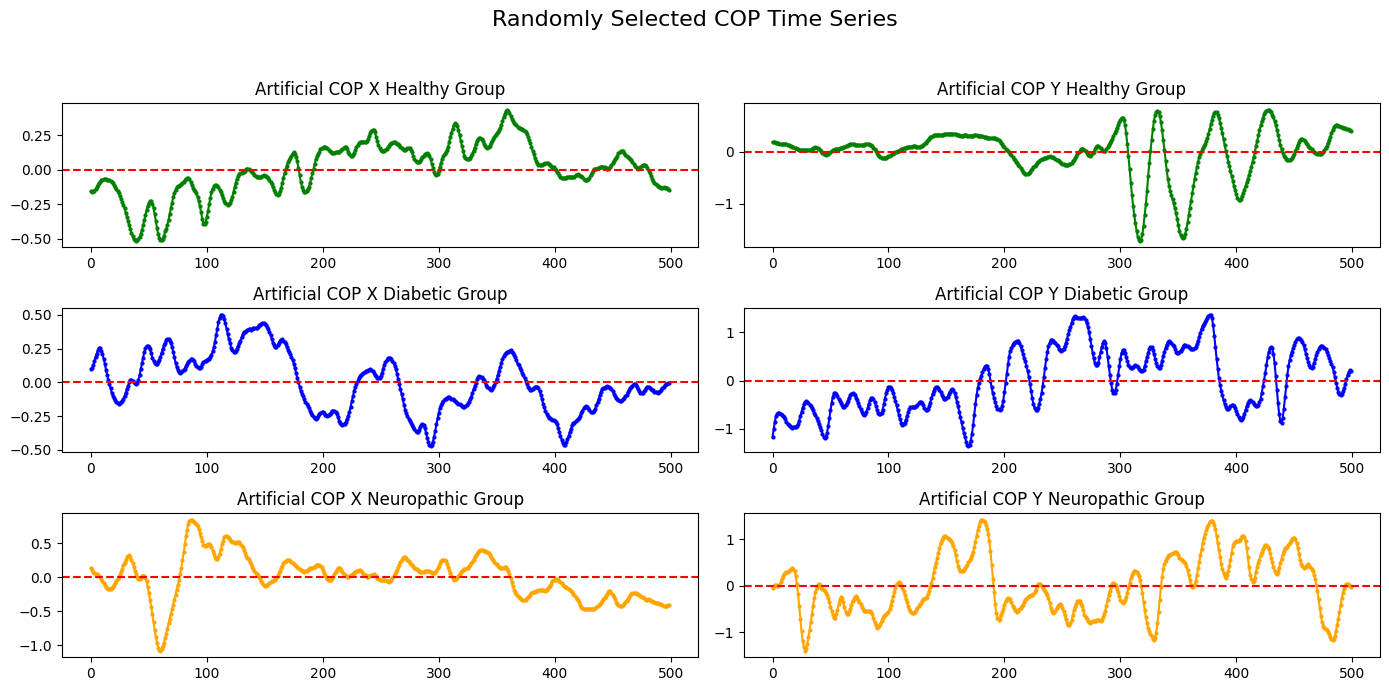

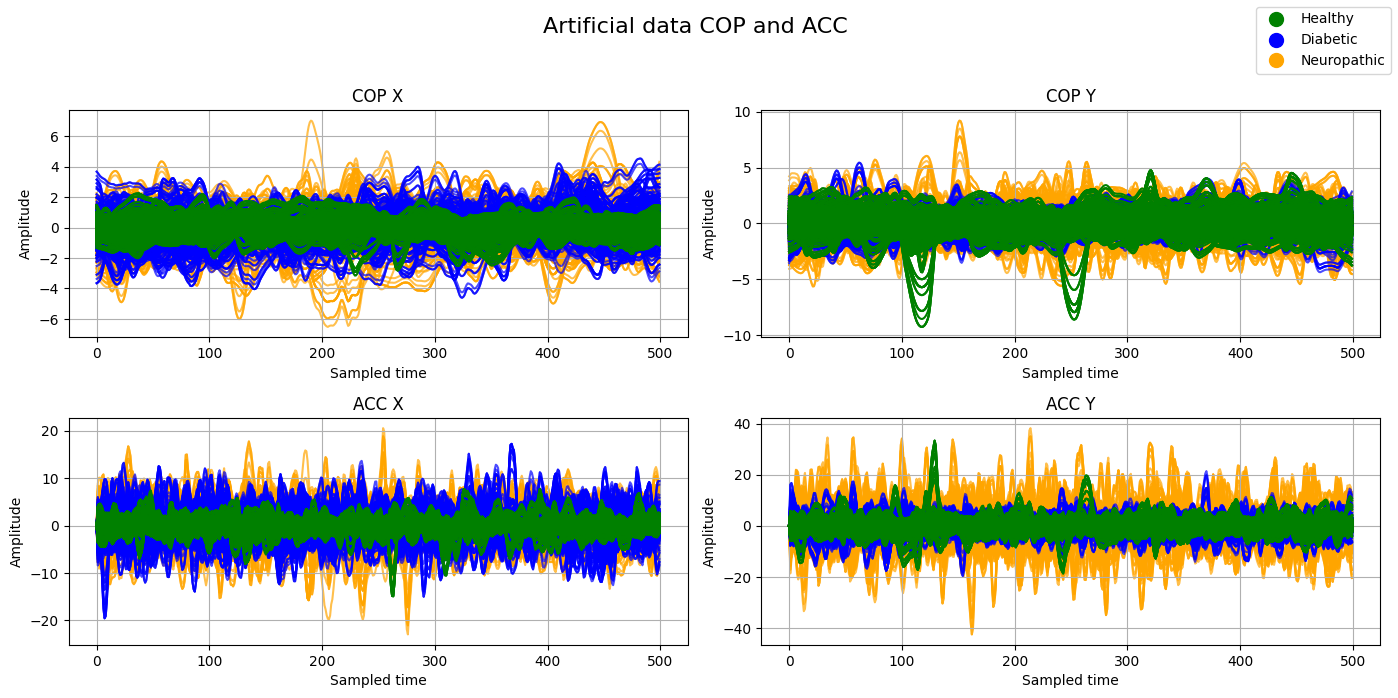

In [13]:
# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(scaled_healthy_cop_x))
diabetic_random_number = random.randint(0, len(scaled_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(scaled_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(scaled_healthy_cop_x[healthy_random_number], scaled_healthy_cop_y[healthy_random_number],
                     scaled_diabetic_cop_x[diabetic_random_number], scaled_diabetic_cop_y[diabetic_random_number],
                     scaled_neuropathic_cop_x[neuropathic_random_number], scaled_neuropathic_cop_y[neuropathic_random_number])
visualize.plot_cop_and_acc_time_series(scaled_data, alt_title='Artificial data COP and ACC')

### Exportation

In [14]:
scaled_data.to_json('../data/processed/scaled_time_series.json', orient='records', lines=True)

## Random Shuffle

In [15]:
shuffled_healthy_cop_x = augmentations.random_shuffling(healthy_cop_x, num_samples=1600, slice_size=50)
shuffled_neuropathic_cop_x = augmentations.random_shuffling(neuropathic_cop_x, num_samples=1600, slice_size=50)
shuffled_diabetic_cop_x = augmentations.random_shuffling(diabetic_cop_x, num_samples=1600, slice_size=50)

shuffled_healthy_cop_y = augmentations.random_shuffling(healthy_cop_y, num_samples=1600, slice_size=50)
shuffled_neuropathic_cop_y = augmentations.random_shuffling(neuropathic_cop_y, num_samples=1600, slice_size=50)
shuffled_diabetic_cop_y = augmentations.random_shuffling(diabetic_cop_y, num_samples=1600, slice_size=50)



shuffled_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(shuffled_healthy_cop_x), pd.Series(shuffled_neuropathic_cop_x), pd.Series(shuffled_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(shuffled_healthy_cop_y), pd.Series(shuffled_neuropathic_cop_y), pd.Series(shuffled_diabetic_cop_y)]),
    'class': ['Healthy'] * len(shuffled_healthy_cop_x) + ['Neuropathic'] * len(shuffled_neuropathic_cop_x) + ['Diabetic'] * len(shuffled_diabetic_cop_x),
    'flag': 'augmented'
})

extractions.add_acceleration_columns(shuffled_data)

Calculating accelerations: 100%|██████████| 4800/4800 [00:00<00:00, 10638.22it/s]


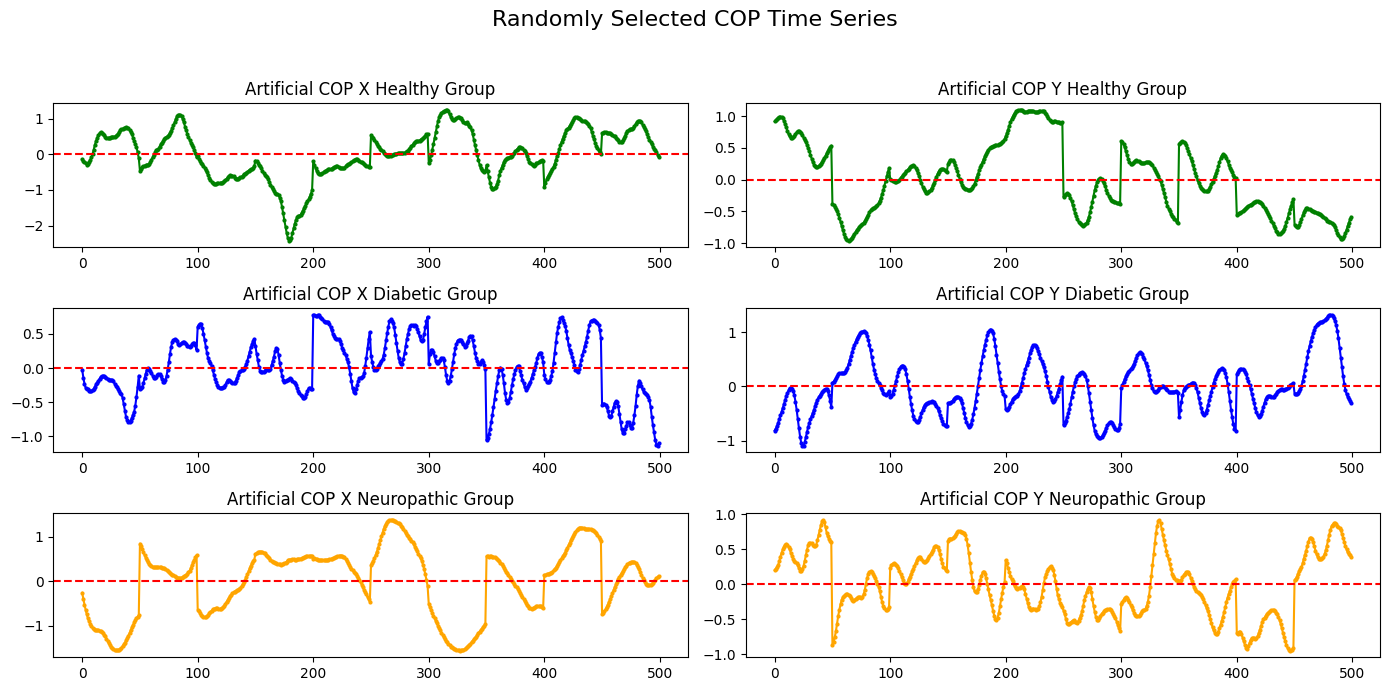

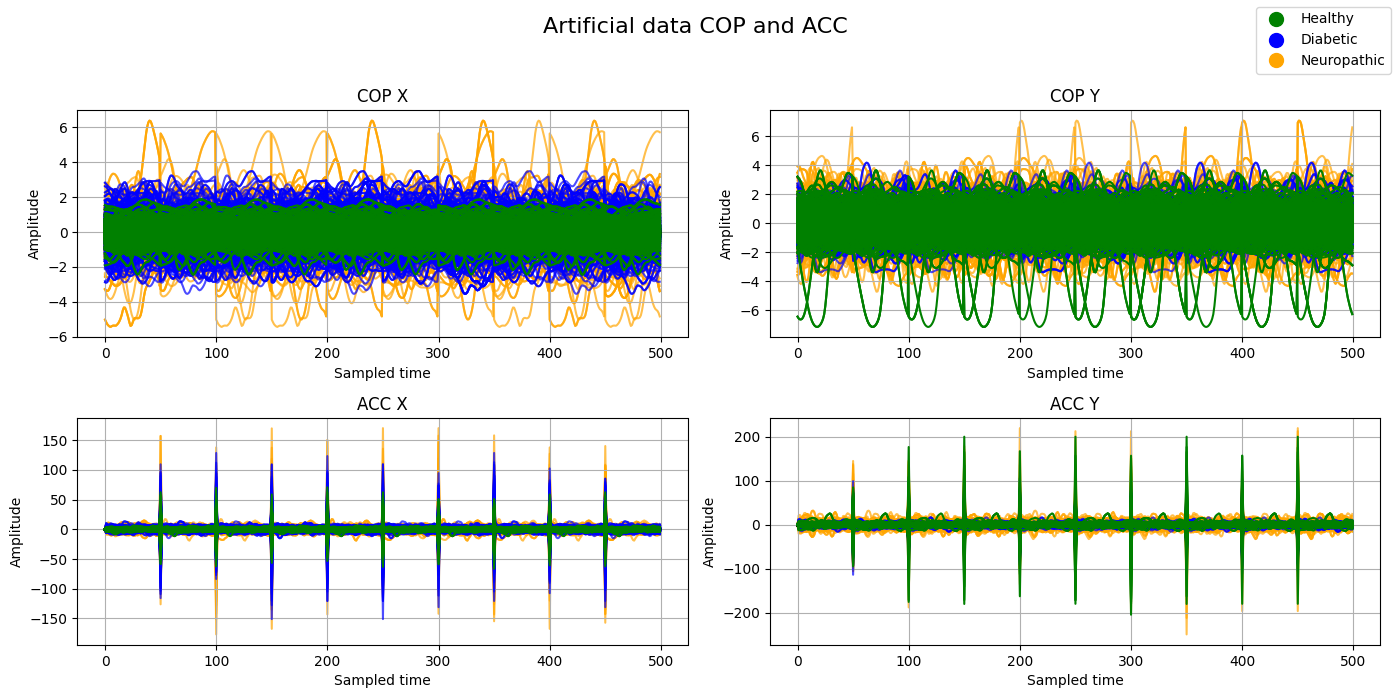

In [16]:
# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(shuffled_healthy_cop_x))
diabetic_random_number = random.randint(0, len(shuffled_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(shuffled_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(shuffled_healthy_cop_x[healthy_random_number], shuffled_healthy_cop_y[healthy_random_number],
                     shuffled_diabetic_cop_x[diabetic_random_number], shuffled_diabetic_cop_y[diabetic_random_number],
                     shuffled_neuropathic_cop_x[neuropathic_random_number], shuffled_neuropathic_cop_y[neuropathic_random_number])
visualize.plot_cop_and_acc_time_series(shuffled_data, alt_title='Artificial data COP and ACC')

### Export

In [17]:
shuffled_data.to_json('../data/processed/shuffled_time_series.json', orient='records', lines=True)

## Window Warping

In [18]:
winWarp_healthy_cop_x = augmentations.window_warping(healthy_cop_x, num_samples=1600)
winWarp_neuropathic_cop_x = augmentations.window_warping(neuropathic_cop_x, num_samples=1600)
winWarp_diabetic_cop_x = augmentations.window_warping(diabetic_cop_x, num_samples=1600)

winWarp_healthy_cop_y = augmentations.window_warping(healthy_cop_y, num_samples=1600)
winWarp_neuropathic_cop_y = augmentations.window_warping(neuropathic_cop_y, num_samples=1600)
winWarp_diabetic_cop_y = augmentations.window_warping(diabetic_cop_y, num_samples=1600)



winWarp_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(winWarp_healthy_cop_x), pd.Series(winWarp_neuropathic_cop_x), pd.Series(winWarp_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(winWarp_healthy_cop_y), pd.Series(winWarp_neuropathic_cop_y), pd.Series(winWarp_diabetic_cop_y)]),
    'class': ['Healthy'] * len(winWarp_healthy_cop_x) + ['Neuropathic'] * len(winWarp_neuropathic_cop_x) + ['Diabetic'] * len(winWarp_diabetic_cop_x),
    'flag': 'augmented'
})

extractions.add_acceleration_columns(winWarp_data)

Calculating accelerations: 100%|██████████| 4800/4800 [00:00<00:00, 10617.21it/s]


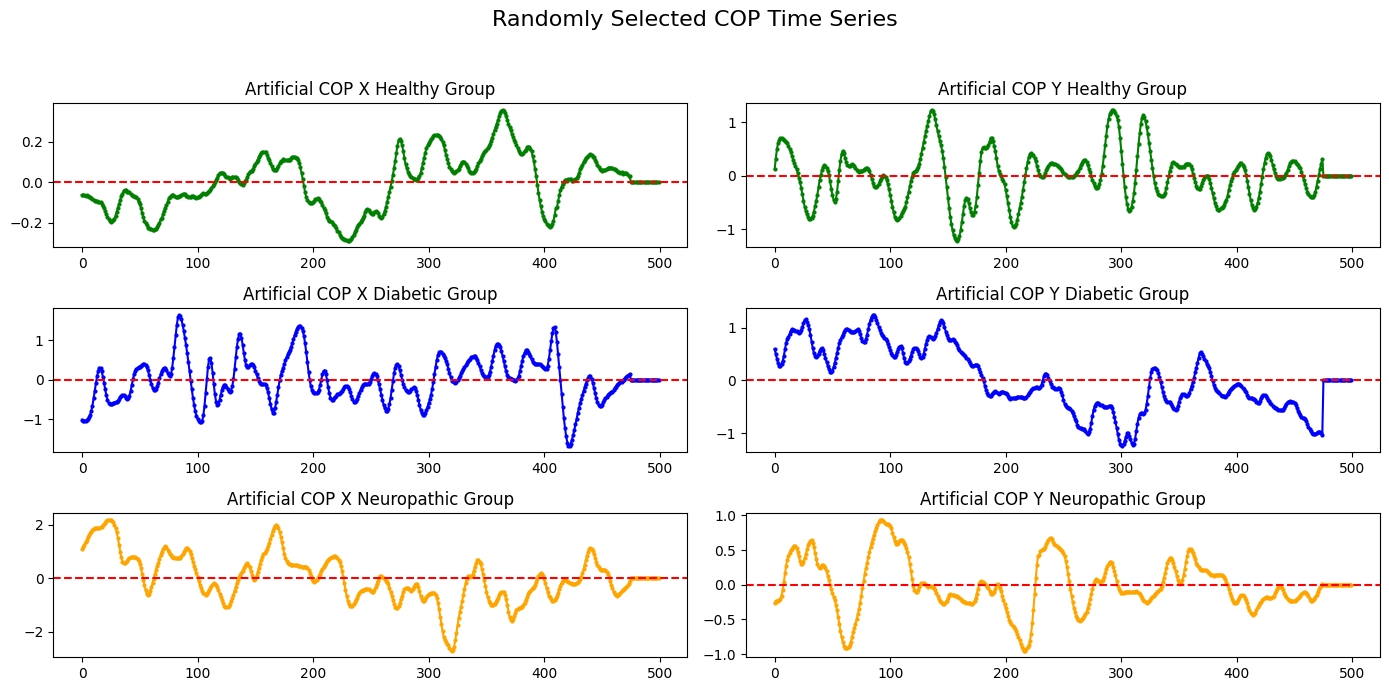

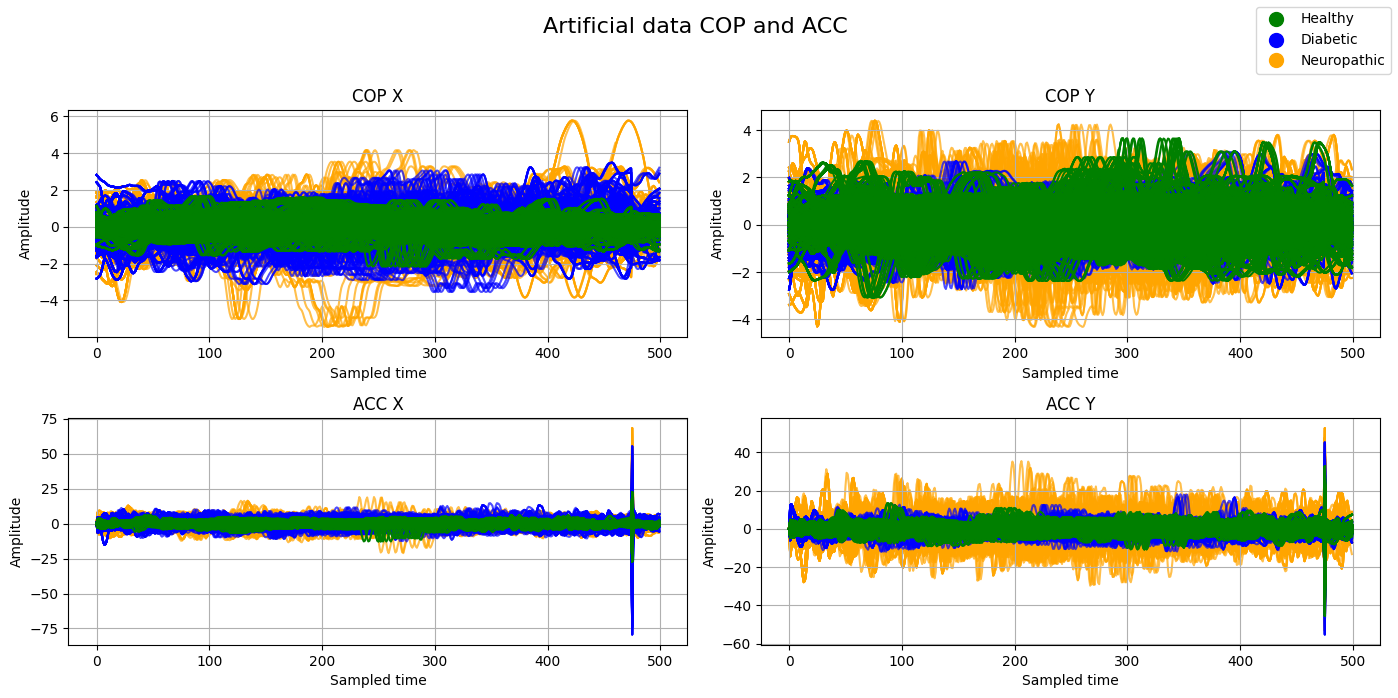

In [19]:

healthy_random_number = random.randint(0, len(winWarp_healthy_cop_x))
diabetic_random_number = random.randint(0, len(winWarp_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(winWarp_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(winWarp_healthy_cop_x[healthy_random_number], winWarp_healthy_cop_y[healthy_random_number],
                     winWarp_diabetic_cop_x[diabetic_random_number], winWarp_diabetic_cop_y[diabetic_random_number],
                     winWarp_neuropathic_cop_x[neuropathic_random_number], winWarp_neuropathic_cop_y[neuropathic_random_number])
visualize.plot_cop_and_acc_time_series(winWarp_data, alt_title='Artificial data COP and ACC')

In [20]:
winWarp_data.to_json('../data/processed/winWarp_time_series.json', orient='records', lines=True)

## SPAWNER

In [3]:
timeSeries = pd.read_json('../data/processed/processed_time_series.json', orient='records', lines=True)

# Filtrar las series de tiempo por clase
healthy_cop_x = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_cop_x = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_cop_x = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

healthy_cop_y = timeSeries[timeSeries['class'] == 'Healthy']['cop_y']
neuropathic_cop_y = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_y']
diabetic_cop_y = timeSeries[timeSeries['class'] == 'Diabetic']['cop_y']

In [4]:
# Convertir las listas de coordenadas en arrays numpy
healthy_cop_x = np.array([np.array(series) for series in healthy_cop_x])
neuropathic_cop_x = np.array([np.array(series) for series in neuropathic_cop_x])
diabetic_cop_x = np.array([np.array(series) for series in diabetic_cop_x])

healthy_cop_y = np.array([np.array(series) for series in healthy_cop_y])
neuropathic_cop_y = np.array([np.array(series) for series in neuropathic_cop_y])
diabetic_cop_y = np.array([np.array(series) for series in diabetic_cop_y])


In [5]:
# Asegurarse de que las etiquetas sean numéricas
label_map = {'Healthy': 0, 'Diabetic': 1, 'Neuropathic': 2}
y = timeSeries['class'].map(label_map).values


In [6]:
# Asegurarse de que las series de tiempo tengan la forma (n_samples, n_timestamps, n_features)
if healthy_cop_x.ndim == 2:
    healthy_cop_x = np.expand_dims(healthy_cop_x, axis=2)
if neuropathic_cop_x.ndim == 2:
    neuropathic_cop_x = np.expand_dims(neuropathic_cop_x, axis=2)
if diabetic_cop_x.ndim == 2:
    diabetic_cop_x = np.expand_dims(diabetic_cop_x, axis=2)

if healthy_cop_y.ndim == 2:
    healthy_cop_y = np.expand_dims(healthy_cop_y, axis=2)
if neuropathic_cop_y.ndim == 2:
    neuropathic_cop_y = np.expand_dims(neuropathic_cop_y, axis=2)
if diabetic_cop_y.ndim == 2:
    diabetic_cop_y = np.expand_dims(diabetic_cop_y, axis=2)


In [7]:
# Asumiendo que quieres generar 1600 datos aumentados por clase
num_samples = 1600

# Llamar a la función spawner para cada clase
spawner_healthy_x = augmentations.spawner(healthy_cop_x, y[timeSeries['class'] == 'Healthy'], num_samples)
spawner_neuropathic_x = augmentations.spawner(neuropathic_cop_x, y[timeSeries['class'] == 'Neuropathic'], num_samples)
spawner_diabetic_x = augmentations.spawner(diabetic_cop_x, y[timeSeries['class'] == 'Diabetic'], num_samples)

spawner_healthy_y = augmentations.spawner(healthy_cop_y, y[timeSeries['class'] == 'Healthy'], num_samples)
spawner_neuropathic_y = augmentations.spawner(neuropathic_cop_y, y[timeSeries['class'] == 'Neuropathic'], num_samples)
spawner_diabetic_y = augmentations.spawner(diabetic_cop_y, y[timeSeries['class'] == 'Diabetic'], num_samples)


100%|██████████| 1600/1600 [01:26<00:00, 18.50it/s]


In [8]:
# Combinar los datos aumentados
augmented_cop_x = np.concatenate([spawner_healthy_x, spawner_neuropathic_x, spawner_diabetic_x])
augmented_cop_y = np.concatenate([spawner_healthy_y, spawner_neuropathic_y, spawner_diabetic_y])


In [9]:
# Crear las etiquetas para los datos aumentados
augmented_y = np.concatenate([
    np.full(spawner_healthy_x.shape[0], label_map['Healthy']),
    np.full(spawner_neuropathic_x.shape[0], label_map['Neuropathic']),
    np.full(spawner_diabetic_x.shape[0], label_map['Diabetic'])
])


In [10]:
# Guardar los datos aumentados en un archivo JSON
augmented_data = pd.DataFrame({
    'cop_x': list(augmented_cop_x),
    'cop_y': list(augmented_cop_y),
    'class': [list(label_map.keys())[label] for label in augmented_y]
})

augmented_data.to_json('../data/processed/spawner_time_series.json', orient='records', lines=True)


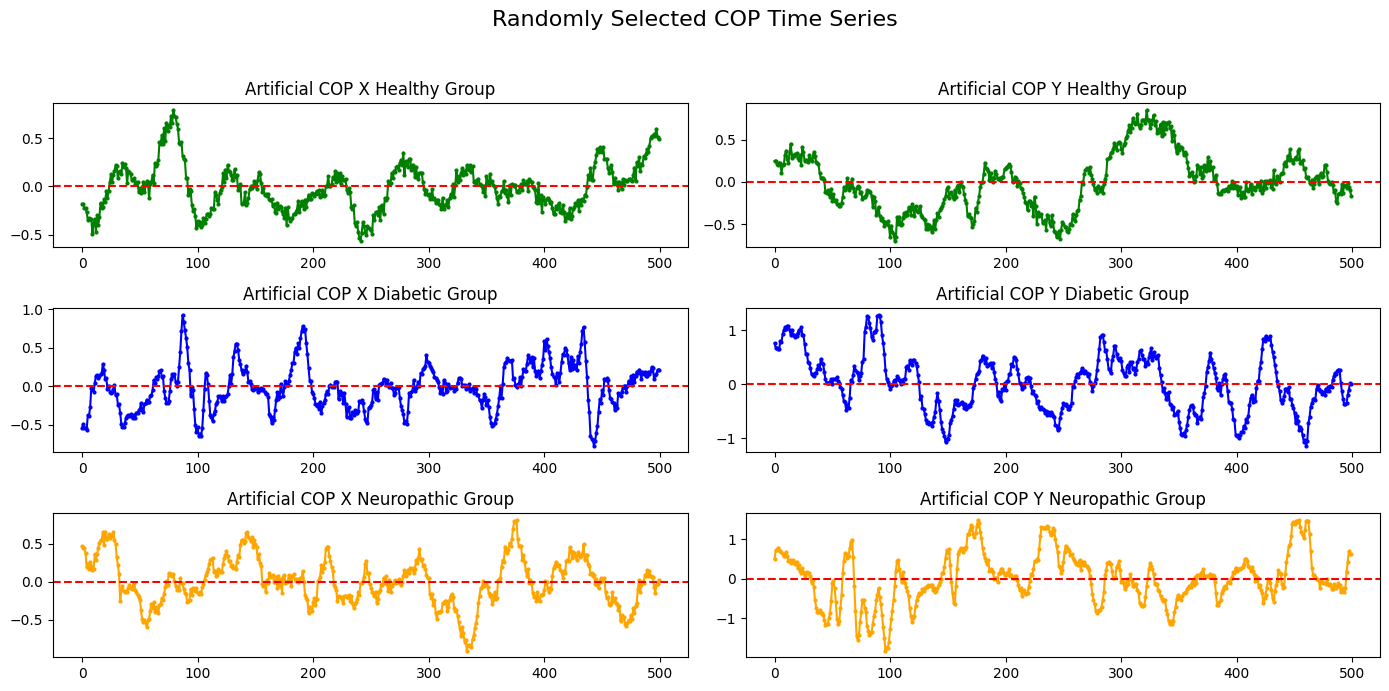

In [13]:

healthy_random_number = random.randint(0, len(spawner_healthy_x))
diabetic_random_number = random.randint(0, len(spawner_diabetic_x))
neuropathic_random_number = random.randint(0, len(spawner_neuropathic_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(spawner_healthy_x[healthy_random_number], spawner_healthy_y[healthy_random_number],
                     spawner_diabetic_x[diabetic_random_number], spawner_diabetic_y[diabetic_random_number],
                     spawner_neuropathic_x[neuropathic_random_number], spawner_neuropathic_y[neuropathic_random_number])

# Random Guided Warping


In [4]:
timeSeries = pd.read_json('../data/processed/processed_time_series.json', orient='records', lines=True)
# Filtrar las series de tiempo por clase
healthy_df = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_df = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_df = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

In [5]:

# Filtrar las series de tiempo por clase
healthy_cop_x = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_cop_x = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_cop_x = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

healthy_cop_y = timeSeries[timeSeries['class'] == 'Healthy']['cop_y']
neuropathic_cop_y = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_y']
diabetic_cop_y = timeSeries[timeSeries['class'] == 'Diabetic']['cop_y']

# Convertir las listas de coordenadas en arrays numpy
healthy_cop_x = np.array([np.array(series) for series in healthy_cop_x])
neuropathic_cop_x = np.array([np.array(series) for series in neuropathic_cop_x])
diabetic_cop_x = np.array([np.array(series) for series in diabetic_cop_x])

healthy_cop_y = np.array([np.array(series) for series in healthy_cop_y])
neuropathic_cop_y = np.array([np.array(series) for series in neuropathic_cop_y])
diabetic_cop_y = np.array([np.array(series) for series in diabetic_cop_y])

# Asegurarse de que las etiquetas sean numéricas
label_map = {'Healthy': 0, 'Diabetic': 1, 'Neuropathic': 2}
y = timeSeries['class'].map(label_map).values

# Asegurarse de que las series de tiempo tengan la forma (n_samples, n_timestamps, n_features)
if healthy_cop_x.ndim == 2:
    healthy_cop_x = np.expand_dims(healthy_cop_x, axis=2)
if neuropathic_cop_x.ndim == 2:
    neuropathic_cop_x = np.expand_dims(neuropathic_cop_x, axis=2)
if diabetic_cop_x.ndim == 2:
    diabetic_cop_x = np.expand_dims(diabetic_cop_x, axis=2)

if healthy_cop_y.ndim == 2:
    healthy_cop_y = np.expand_dims(healthy_cop_y, axis=2)
if neuropathic_cop_y.ndim == 2:
    neuropathic_cop_y = np.expand_dims(neuropathic_cop_y, axis=2)
if diabetic_cop_y.ndim == 2:
    diabetic_cop_y = np.expand_dims(diabetic_cop_y, axis=2)

In [6]:
# Asumiendo que quieres generar 100 datos aumentados por clase
num_samples = 1600

# Llamar a la función spawner para cada clase
rgw_healthy_x = augmentations.random_guided_warp(healthy_cop_x, y[timeSeries['class'] == 'Healthy'], num_samples)
rgw_neuropathic_x = augmentations.random_guided_warp(neuropathic_cop_x, y[timeSeries['class'] == 'Neuropathic'], num_samples)
rgw_diabetic_x = augmentations.random_guided_warp(diabetic_cop_x, y[timeSeries['class'] == 'Diabetic'], num_samples)

rgw_healthy_y = augmentations.random_guided_warp(healthy_cop_y, y[timeSeries['class'] == 'Healthy'], num_samples)
rgw_neuropathic_y = augmentations.random_guided_warp(neuropathic_cop_y, y[timeSeries['class'] == 'Neuropathic'], num_samples)
rgw_diabetic_y = augmentations.random_guided_warp(diabetic_cop_y, y[timeSeries['class'] == 'Diabetic'], num_samples)

100%|██████████| 1600/1600 [02:47<00:00,  9.54it/s]


In [7]:

def convertir_a_serie_de_tiempo(data):
    series_de_tiempo = []
    for i in range(data.shape[0]):
        serie = data[i, :, 0]  # Tomamos solo la primera característica por paso de tiempo
        series_de_tiempo.append(serie)
    return np.array(series_de_tiempo)  # Convertimos la lista de arrays en un array de NumPy

series_de_tiempo_x_healthy = convertir_a_serie_de_tiempo(rgw_healthy_x)
series_de_tiempo_x_neuropathic = convertir_a_serie_de_tiempo(rgw_neuropathic_x)
series_de_tiempo_x_diabetic = convertir_a_serie_de_tiempo(rgw_diabetic_x)
series_de_tiempo_y_healthy = convertir_a_serie_de_tiempo(rgw_healthy_y)
series_de_tiempo_y_neuropathic = convertir_a_serie_de_tiempo(rgw_neuropathic_y)
series_de_tiempo_y_diabetic = convertir_a_serie_de_tiempo(rgw_diabetic_y)

cop_x_data = np.concatenate((series_de_tiempo_x_healthy, series_de_tiempo_x_neuropathic, series_de_tiempo_x_diabetic))
cop_y_data = np.concatenate((series_de_tiempo_y_healthy, series_de_tiempo_y_neuropathic, series_de_tiempo_y_diabetic))

4800

In [8]:

rgw_data = pd.DataFrame({
    'cop_x': cop_x_data.tolist(),  
    'cop_y': cop_y_data.tolist(), 
    'class': ['Healthy'] * 1600 + ['Neuropathic'] * 1600 + ['Diabetic'] * 1600,
    'flag': 'augmented'
})
rgw_data.to_json('../data/processed/rgw_data.json', orient='records', lines=True)

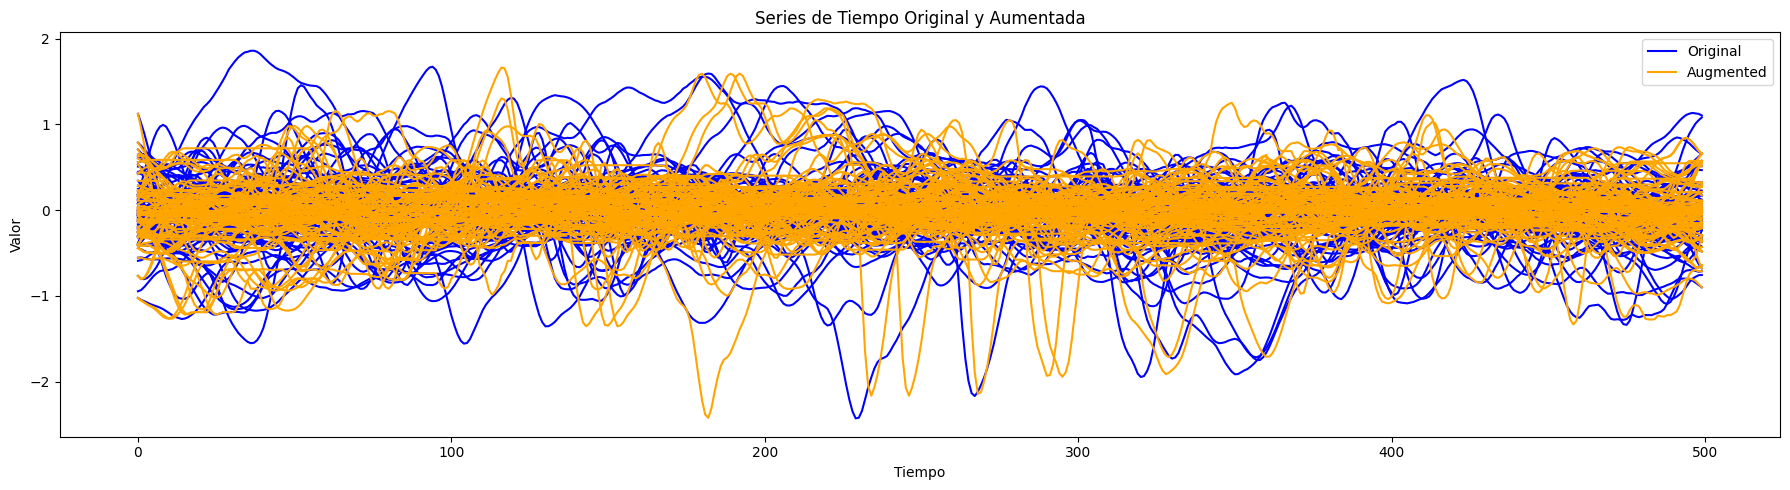

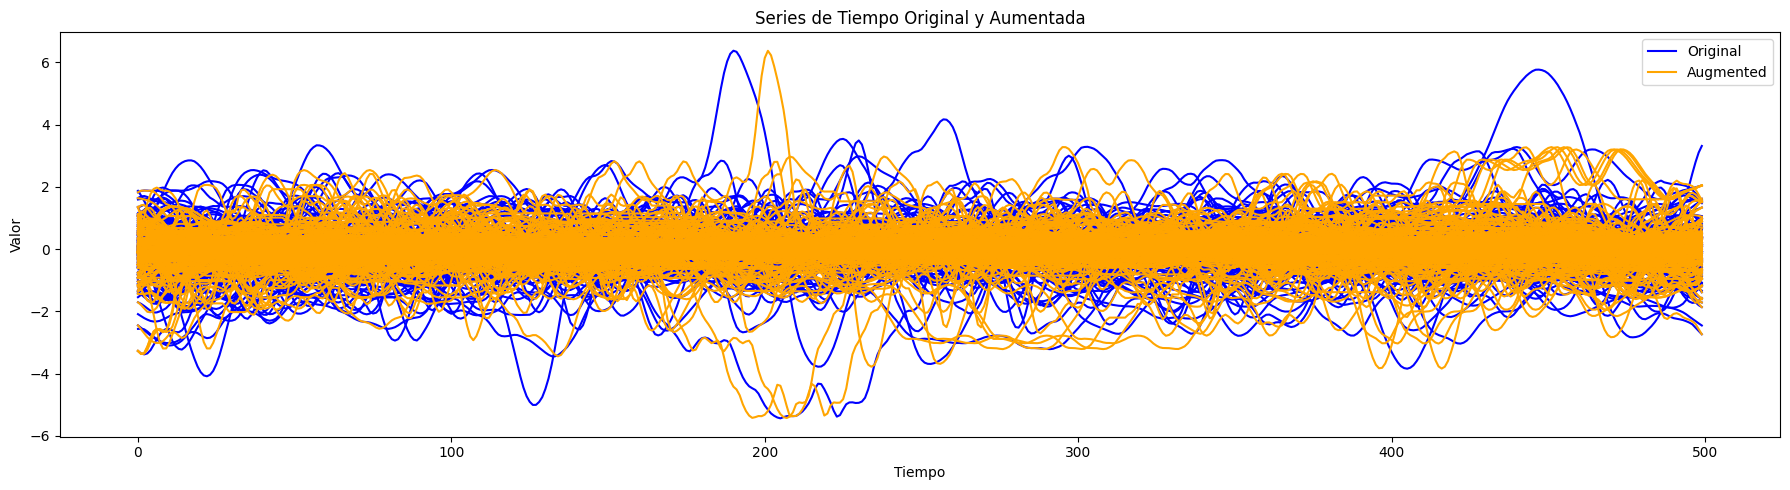

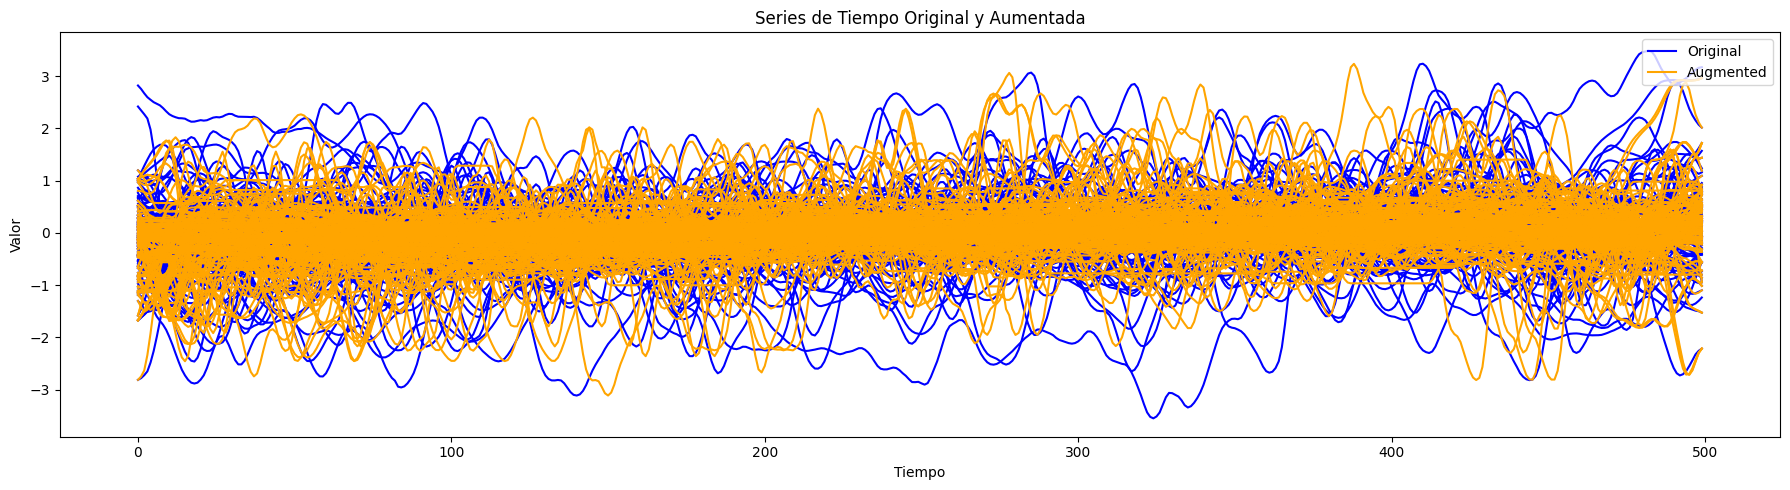

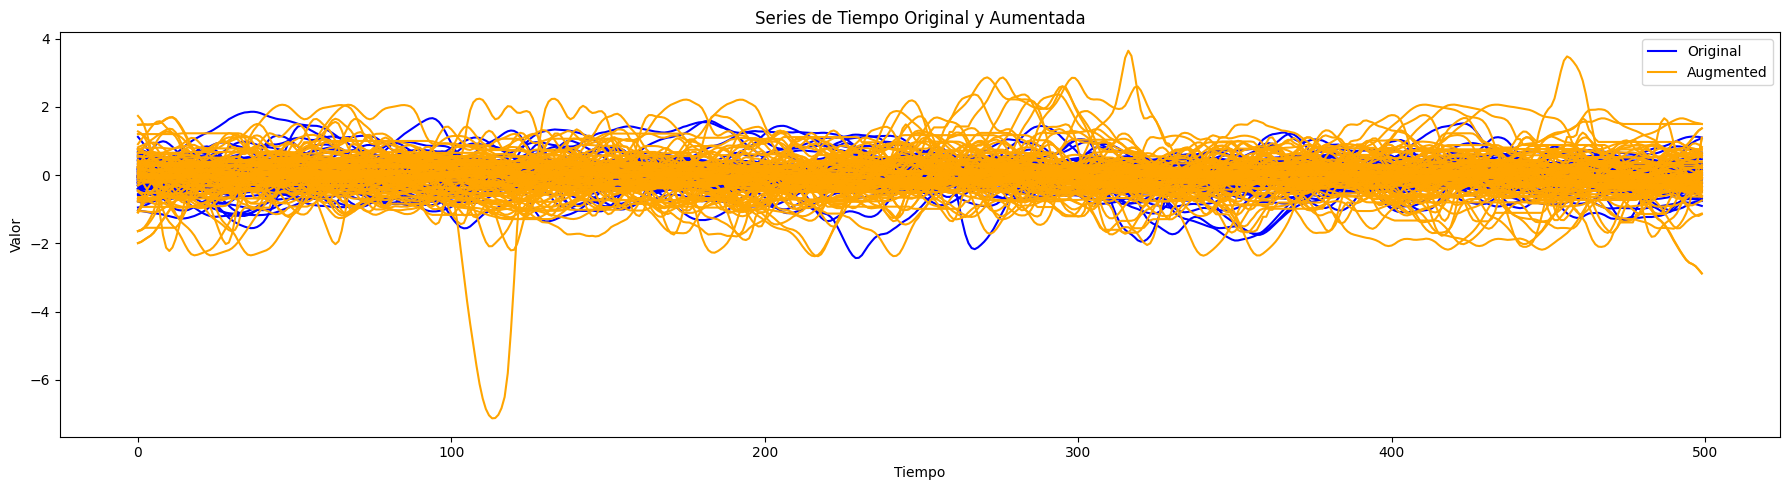

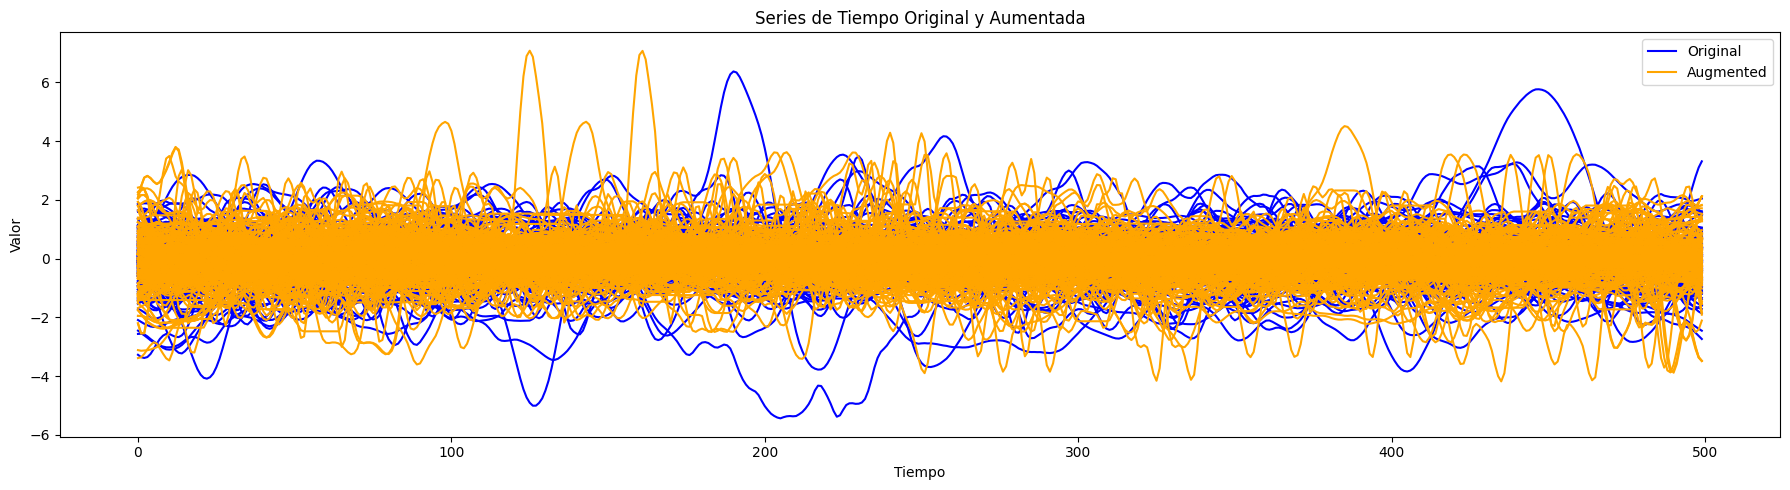

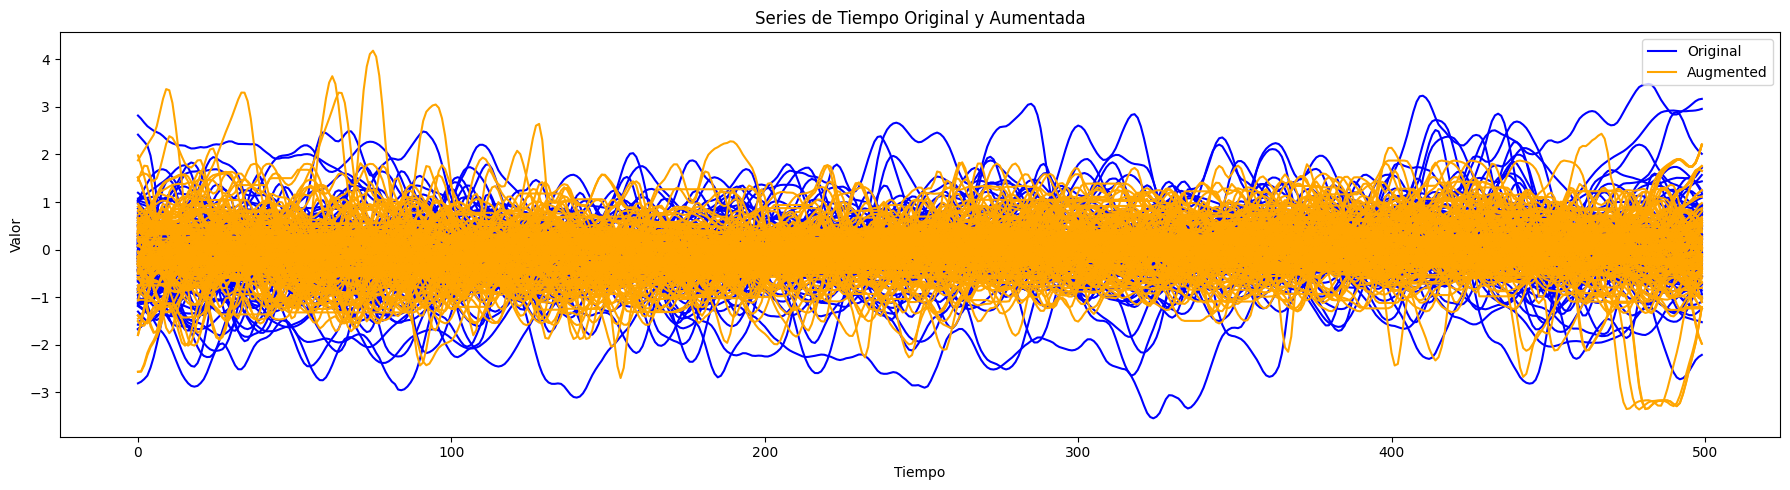

In [9]:
plot_series(healthy_cop_x, rgw_healthy_x)
plot_series(neuropathic_cop_x, rgw_neuropathic_x)
plot_series(diabetic_cop_x, rgw_diabetic_x)
plot_series(healthy_cop_x, rgw_healthy_y)
plot_series(neuropathic_cop_x, rgw_neuropathic_y)
plot_series(diabetic_cop_x, rgw_diabetic_y)